# 各種ゲートによって何が起こるかを見てみる

## 事前準備

In [ ]:
# Ready to use Qiskit (for Google Colab)
!pip install qiskit pylatexenc

In [2]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

## シミュレータの用意

In [3]:
simulator = QasmSimulator()

## アダマールゲート

---

アダマールゲート $H$は  
$\displaystyle H(|0\rangle) = \frac{1}{\sqrt{2}}\left( |0\rangle + |1\rangle \right)$

となる、つまり1量子ビットにアダマールゲートを適用するとほぼ等確率で0と1が観測されることを確認する


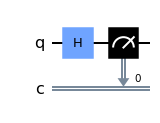

In [4]:
c1 = QuantumCircuit(1,1)
c1.h(0)
c1.measure(0, 0)
c1.draw(output='mpl')

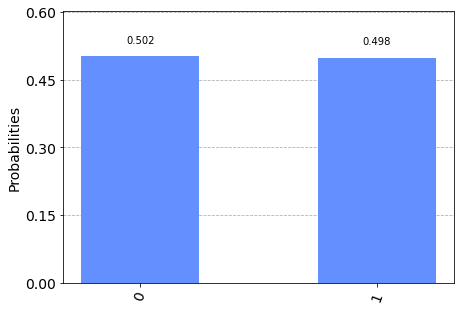

In [5]:
compiled_c1 = transpile(c1, simulator)
j1 = simulator.run(compiled_c1, shots=1000)
r1 = j1.result()
plot_histogram(r1.get_counts(c1))

## CNOTゲート

CNOTゲートのIN-OUT対応表は以下

|INPUT|OUTPUT|
|----|----|  
|\|$00\rangle$|\|$00\rangle$|
|\|$01\rangle$|\|$01\rangle$|
|\|$10\rangle$|\|$10\rangle$|
|\|$11\rangle$|\|$11\rangle$|

以下では$|00\rangle$が$|00\rangle$のみの出力になることを確かめる

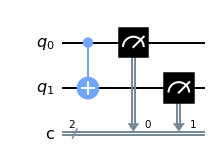

In [6]:
c2 = QuantumCircuit(2, 2)
c2.cx(0, 1)
c2.measure([0, 1], [0, 1])
c2.draw(output='mpl')

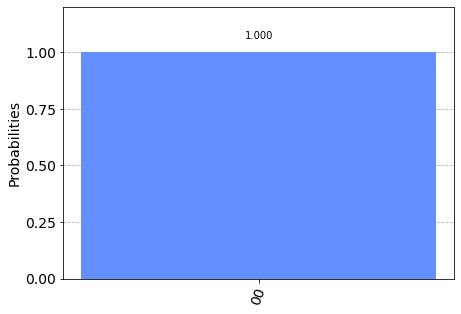

In [7]:
compiled_c2 = transpile(c2, simulator)
j2 = simulator.run(compiled_c2, shots=1000)
r2 = j2.result()
plot_histogram(r2.get_counts(c2))